# Probability of Winning the Lottery

Consider a state lottery and the probability of winning the grand prize. The game is played by selecting a group of 6 numbers from {1, 2, 3, ..., 51}, and the state selects a group of 6 numbers from the same set. You win the grand prize if all 6 of your numbers match the state's. The probability of winning is so low that some people are trying different ways of increasing their odds.

Tasks:

    - Identify whether the probability of winning is discrete or continuous. Write a Python function that calculates the probability of winning the grand prize for the new game, given that a group of 6 numbers are selected from {1, 2, 3, ..., 51}. 
    - 6Alexandra buys 1 ticket every 24 hours of every 365 days per year for 80 years of her life. Each ticket costs 5 dollard and she selects her numbers independently from one ticket to the next. Write a Python program that calculates the probability of Alexandra winning the lottery at least one time and the amount of money she spends trying.
    - Amir decides to increase his chance of winning by organizing N of his friends to buy one ticket each for this week's drawing. Each friend buys a ticket independently, and the minimum value of N (Nmin(epsilon)) to ensure that the probability that there is at least one winner among the group is greater than or equal to epsilon needs to be calculated for various values of epsilon. Write a Python function that calculates the value of Nmin(epsilon) for epsilon = 10-5, 10-3, 0.1, and 0.5.
    - If Amir has gathered enough friends to win with probability 0.5 using the above strategy, write a Python program that determines a way that they can increase their win probability above 0.5 without adding more people to the group.
    - The state lottery commissioner introduces a consolation prize: If exactly 3 of your 6 numbers match any 3 of the state's, you win a smaller prize. Write a Python program that calculates the probability of winning the consolation prize and the expected value of the consolation prize. Is this consolation prize likely to increase sales?

In [15]:
#import librery

import matplotlib.pyplot as plt
from math import comb
from math import factorial

# 1. Probability of Winning the Grand Prize

The probability of winning the grand prize in the lottery game described is a discrete probability. 

What is a discrete distribution?

    A discrete distribution is a probability distribution that describes the occurrence of discrete (individually countable) outcomes.



Note that it was not specified whether the choice would be made in order or without regard to order.

    If you choose 6 numbers out of 51 in a specific order (for example, 1st number, 2nd number, ..., 6th number), you're calculating permutations.
    
    If you choose 6 numbers from 51 in any order (just the set of numbers), you're calculating combinations.

We will calculate the probability in both cases

- First, I calculated the possible combinations for the 6-number draw in any order (combinations).

Each combination of 6 numbers in the set {1, 2, 3, ..., 51} corresponds to a unique outcome, and the number of favorable outcomes (winning combinations) can be calculated directly.


In [23]:
#6 matches = C(51,6)

total_numbers = 51
selected_numbers = 6
possible_combinations = comb(total_numbers, selected_numbers)
possible_combinations

18009460

In [24]:
# Probability
#let's calculate the probability using the formula 1/C(n,r)

probability_comb = 1 / possible_combinations


print(f"The probability of winning the grand prize When the order of selection doesn't matter is {probability_comb:.10f}")

The probability of winning the grand prize When the order of selection doesn't matter is 0.0000000555


- secondly , we'll calculate the 6-digit draw in a precise order.(permutations)

When selecting numbers in a specific order, the arrangement matters. 

In [25]:
# Total number of possible outcome
total_outcomes = factorial(51) // factorial(51 - 6)
total_outcomes


12966811200

In [26]:
# Probability
probability_per = 1 / total_outcomes
print(f"The probability of winning the grand prize in a precise order is {probability_per:.10f}")

The probability of winning the grand prize in a precise order is 0.0000000001


You'll observe that the permutation count will be greater than the combination count due to the consideration of order in permutations.

# For the rest of the exercise, we will choose The probability of winning the grand prize When regardless of the order of selection  (combinations). 

# 2. Probability of Winning for Alexandra

# for combinations (draw in any order)

1. Alexandra buys a ticket every 24 hours, every 365 days of the year, for the 80 years of her life. 
    
    - first, let's determine the number of tickets she has purchased

In [27]:
tickets_per_day = 1
days_per_year = 365
years = 80

tickets_purchased = tickets_per_day * days_per_year * years
tickets_purchased

29200

- let's find out how much she spent

In [30]:
ticket_cost = 5
total_cost = tickets_purchased * ticket_cost
print(f"she spent {total_cost} dolard in 80 years")

she spent 146000 dolard in 80 years


2. Let's calculate the probability of Alexandra winning the lottery at least once 

To do this, we will first calculate the probability she never wins the lottery, then deduce the probability she wins least one time the lottery.

- Let's calculate the probability of her never winning the lottery

This probability corresponds to the probability of losing in 1 day, exponent the number of days, since the probability multiplies each day.

In [31]:
never_win = (1 - probability_comb) ** tickets_purchased
never_win

0.9983799435625311

- probability of Alexandra winning the lottery at least once

In [32]:
probability_at_least_once = 1 - never_win
print(f"probability of Alexandra winning the lottery at least once is {probability_at_least_once} ")

probability of Alexandra winning the lottery at least once is 0.0016200564374688753 


# 3. calculate the value of Nmin(epsilon) 

Amir wants to ensure that the probability of winning is greater than or equal to certain thresholds (epsilon) by organizing a number(Nmin) of his friends to each buy a ticket for this week's draw.

Let's write a Python function to calculate the minimum number of friends required to reach the desired probabilities.

In [40]:
Nmin_values = []
Nmin = 1
for epsilon in [10**-5, 10**-3, 0.1, 0.5]:
        probability_winner = 1 - (1 - probability_comb) ** Nmin
        
        while probability_winner < epsilon:
            Nmin += 1
            probability_winner = 1 - (1 - probability_comb) ** Nmin
            
            
        Nmin_values.append(Nmin)

Nmin_values
print("Nmin values for different epsilon values:", Nmin_values)



Nmin values for different epsilon values: [181, 18019, 1897486, 12483207]


#  4. Increase the probability of Amir's group winning

If Amir's group already has a probability of winning greater than 0.5, they can further increase their chances by employing a strategy such as buying more tickets. 

In [73]:
#The best way for Amir to increase the probability of winning by more than 0.5 is to increase the number of tickets purchased per person.

#Nim represents the minimum number of friends required to obtain the probability of 0.5.
Nmin = 12483207

#we will develop a code to determine the minimum Ticket interval to have a probability between 0.5 and 1.
total_tickets = []
probability_no_winner = 0.5
tickets = 1

while probability_no_winner <= 0.5: 
    
    tickets = tickets + 1
    
    while probability_no_winner < 1:
        
        
        new_probability = 1 - (1 - probability_comb) ** tickets
    

        probability_no_winner = 1 - (1 - new_probability) ** Nmin
        
            
        total_tickets.append(tickets)
        tickets = tickets + 1


#let's consider 'y' as the probability of winning according to the number of tickets per person
y = []
for i in total_tickets:
    
    new_probability = 1 - (1 - probability_comb) ** i
    probability_winner = 1 - (1 - new_probability) ** Nmin

    y.append(probability_winner)
    
print(total_tickets)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]


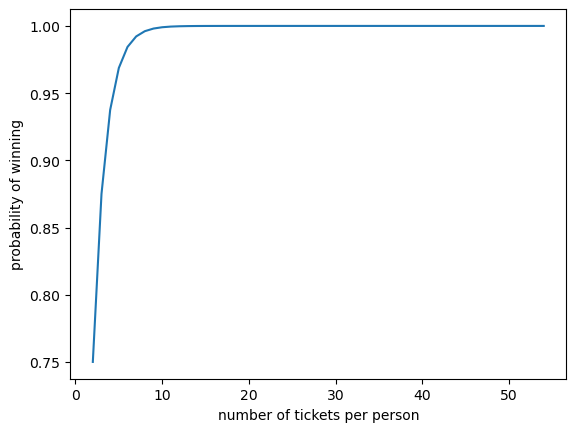

In [77]:

plt.plot(total_tickets, y)
plt.xlabel('number of tickets per person')
plt.ylabel('probability of winning')
plt.show()

# Verification

In [65]:
#for 2 tickets per person we have:
total_tickets = 2
new_probability = 1 - (1 - probability_comb) ** total_tickets
probability_winner = 1 - (1 - new_probability) ** Nmin

print("Nmin values for different epsilon values:", Nmin_values)
probability_winner

0.7500000257442363

In [68]:
#for 54 tickets per person we have:
total_tickets = 54
new_probability = 1 - (1 - probability_comb) ** total_tickets
probability_winner = 1 - (1 - new_probability) ** Nmin

probability_winner

1.0

From two Tickect purchased per person, the probability is greater than 0.1.

we also note that from 54 Tickets per person, the probability of winning is equal to 1, which means he'll be sure to win.

# 5. probability of winning the consolation prize and the expected value of the consolation prize. 

The state lottery commissioner introduces a consolation prize: if exactly 3 of your 6 numbers match 3 of the state numbers, you win a smaller prize.

Let's write a Python program to calculate the probability of winning the consolation prize and the expected value of the consolation prize.


In [79]:
# Assuming the consolation prize amount is $100000, you can adjust this value accordingly

consolation_prize_amount = 100000
selected_numbers_consolation = 3
probability_consolation = comb(6, selected_numbers_consolation) * comb(45, 3) / comb(51, 6)
expected_value_consolation = probability_consolation * consolation_prize_amount


print(f"Probability of winning the consolation prize: {probability_consolation:.10f}")
print(f"Expected value of the consolation prize: ${expected_value_consolation:.2f}")

Probability of winning the consolation prize: 0.0157583848
Expected value of the consolation prize: $1575.84


As per the impact on sales, introducing a consolation prize might increase ticket sales, as it provides players with additional chances of winning something, albeit a smaller amount than the grand prize. It could attract players who may be discouraged by the low probability of winning the grand prize alone.